# <center><font size=6>实训一

# <center><font size=2>假设missing_data.csv的行标签分别为用户A,B,C。列标签分别为第1月，第2月等等，用电量数值单位为度（千瓦时）。

# <center><font size=2>训练目标：掌握缺失值识别的方法和对缺失值数据处理的方法需求说明：用户用电量数据呈现一定的周期性关系，data1存放了用户A,B,C的用电量数据，其中存在缺失值，需要进行缺失值插补才能进行下一步分析。实现思路和步骤：读取missing_data.csv的数据，查询缺失值所在位置，使用Scipy库中interpolate模块中的langrange对数据进行拉格朗日插值，查看数据中是否存在缺失值，若不存在则说明插值成功。

In [8]:
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
import pandas as pd
import numpy as np
import csv#导入数据分析库
data1=pd.read_csv(’D:/Desktop/missing_data.csv‘)#读取missing_data.csv的数据
print("缺失值所在位置")#查询缺失值所在位置
#使用Scipy库中interpolate模块中的langrange对数据进行拉格朗日插值
#自定义列向量插值函数
#s为列向量，n为被插值的位置，K为取前后的数据个数，默认为5
def ployinterp_column(s, n, k=5):    
    y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))] #取数，转换成列表    
    y = y[y.notnull()] #剔除空值    
    return lagrange(y.index, list(y))(n)
#逐个元素判断是否需要插值
for i in data1.columns:    
    for j in range(len(data1)):        
        if (data1[i].isnull())[j]: #如果为空即插值            
            data1[i][j] = ployinterp_column(data1[i], j) 
print(data1)#输出结果

缺失值所在位置
      235.8333    324.0343    478.3231
0   236.270800  325.637900  515.456400
1   238.052100  328.089700  517.090900
2   235.906300  151.298452  514.890000
3   236.760400  268.832400  486.475945
4   236.629860  404.048000  486.091200
5   237.416700  391.265200  516.233000
6   238.656300  380.824100  490.886437
7   237.604200  388.023000  435.350800
8   238.031300  206.434900  487.675000
9   235.072900  237.348072  608.755004
10  235.531300  400.078700  660.234700
11  235.314952  411.206900  621.234600
12  234.468800  395.234300  611.340800
13  235.500000  344.822100  643.086300
14  235.635400  385.643200  642.348200
15  234.552100  401.623400  618.197192
16  236.000000  409.648900  602.934700
17  235.239600  416.879500  589.345700
18  235.489600  420.748600  556.345200
19  236.968800  408.963200  538.347000


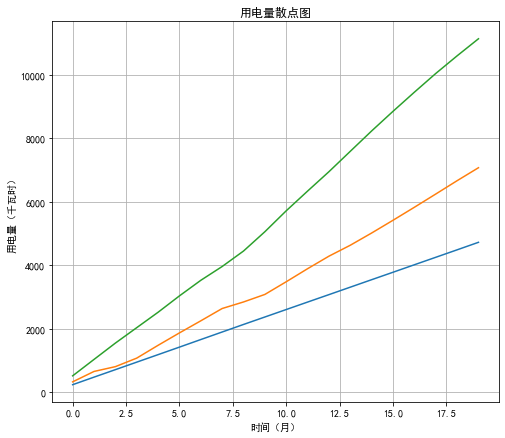

In [16]:
#一维数据画图
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
p=plt.figure(figsize=(8,7))
plt.plot(data1.cumsum())
plt.grid(True) ##增加格点
plt.axis('tight') # 坐标轴适应数据量 axis 设置坐标轴
plt.xlabel('时间（月）')
plt.ylabel('用电量（千瓦时）')
plt.title("用电量折线累加图")
plt.show()
#蓝线为用户A，红线为用户B，绿线为用户C
#用户用电量均成类线性增长，且用户C增长最快，量最大，B次之，A最次
#B的用电量有波动，其他变化不大

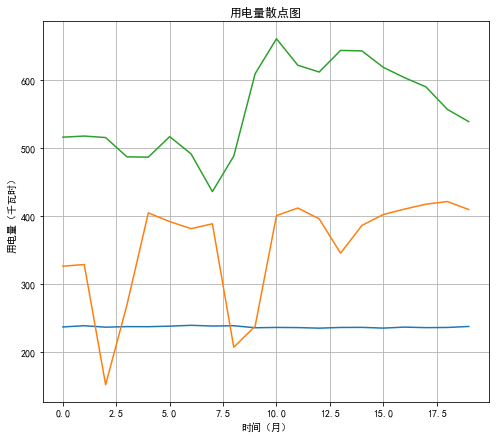

In [17]:
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
p=plt.figure(figsize=(8,7))
plt.plot(data1)
plt.grid(True) ##增加格点
plt.axis('tight') # 坐标轴适应数据量 axis 设置坐标轴
plt.xlabel('时间（月）')
plt.ylabel('用电量（千瓦时）')
plt.title("用电量折线单月图")
plt.show()
#B,C的用电量有波动，A几乎不变
#而且2个用户变化有一定周期性，每6个月一次波动